## 문제인 대통령의 하루

** 플로차트 **

1. 한글 '세종사전' 로딩 // useSejoingDic()
2. 팔레트 생성  // Pal2  <- brewer.pal()
3. 파일 읽기 // read.csv()  / readLine() - txt 파일 전체 읽어오기(ex.연설문)
4. 파일 행별 명사 추출 noun <- sapply()
5. 추출된 명사 통합 noun2  <- unlist()
6. 단어별 빈도수 계산 word_count  <- table()
7. 워드클라우드 출력 wordcloud()

-----------

8. 세종사전에 없는 단어 추가 mergeUserDic()
9. 파일 행별 명사 추출 noun <- sapply
10. 추출된 명사 통합 noun2 <- unlist()
11. 불필요한 단어 삭제 noun2  <- gsub()
12. 단어 필터링 noun2 <- Filter()
13. 단어 빈도수 계산 word_count  <-  table()
14. 워드클라우드 출력 wordcloud()

## Import Library

1. 한글 '세종사전'로딩

In [6]:
# 별도로 설치하려면 http://cran.us.r-project.org 경로로 다운.
# install.packages("KoNLP", repos = "http://cran.us.r-project.org") 

also installing the dependencies 'bit', 'bit64', 'blob', 'memoise', 'whisker', 'git2r', 'withr', 'rJava', 'hash', 'tau', 'Sejong', 'RSQLite', 'devtools'



package 'bit' successfully unpacked and MD5 sums checked
package 'bit64' successfully unpacked and MD5 sums checked
package 'blob' successfully unpacked and MD5 sums checked
package 'memoise' successfully unpacked and MD5 sums checked
package 'whisker' successfully unpacked and MD5 sums checked
package 'git2r' successfully unpacked and MD5 sums checked
package 'withr' successfully unpacked and MD5 sums checked
package 'rJava' successfully unpacked and MD5 sums checked
package 'hash' successfully unpacked and MD5 sums checked
package 'tau' successfully unpacked and MD5 sums checked
package 'Sejong' successfully unpacked and MD5 sums checked
package 'RSQLite' successfully unpacked and MD5 sums checked
package 'devtools' successfully unpacked and MD5 sums checked
package 'KoNLP' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\david\AppData\Local\Temp\RtmpqonCri\downloaded_packages


In [12]:
# 하지만 C:/Users/david/Anaconda3/R/library 에 있는 라이브러리 호출 가능?!
# library("wordcloud", "C:/Users/david/Anaconda3/R/library")
# library(RColorBrewer, "C:/Users/david/Anaconda3/R/library")

In [2]:
library(KoNLP) #한글사전
library(wordcloud) #워드클라우드
library(RColorBrewer) #팔레트

Warning message:
"package 'KoNLP' was built under R version 3.4.2"Checking user defined dictionary!

Warning message:
"package 'wordcloud' was built under R version 3.4.2"Loading required package: RColorBrewer


In [3]:
useSejongDic() #1 

Backup was just finished!
370957 words dictionary was built.


## Data Loading

In [4]:
#데이터 불러오기
moon <- read.csv("../dataset/Moon_schedule.csv", stringsAsFactors = FALSE)
head(moon)

날짜,시간,장소,일정명,참석자
2017년 10월 2일 월요일,10:00,도로공사 교통정보센터,"""도로공사 교통정보센터 방문 및 직원 격려 _TBS 교통방송 라디오 출연""","김현미 국토부 장관 및 도로공사 사장, 교통센터장, 고속도로 순찰대장 등"
2017년 10월 2일 월요일,14:55,관저 회의실,'명절이 없는 이들' 격려전화,
2017년 10월 2일 월요일,16:38,관저 회의실,정책실 업무현안보고,
2017년 10월 6일 금요일,12:20,안동하회마을,안동 하회마을 방문,"유홍준 전 문화재청장 및 도산서원 선비문화수련원, 한국문화정책연구소, 안동하회마을보존회 등 관계자"
2017년 10월 8일 일요일,14:00,관저 회의실,비서실 업무현안보고,
2017년 10월 8일 일요일,17:30,관저 회의실,현안 관련 내각 보고,


In [5]:
str(moon)

'data.frame':	98 obs. of  5 variables:
 $ 날짜  : chr  "2017년 10월 2일 월요일" "2017년 10월 2일 월요일" "2017년 10월 2일 월요일" "2017년 10월 6일 금요일" ...
 $ 시간  : chr  "10:00" "14:55" "16:38" "12:20" ...
 $ 장소  : chr  "도로공사 교통정보센터" "관저 회의실" "관저 회의실" "안동하회마을" ...
 $ 일정명: chr  "\"도로공사 교통정보센터 방문 및 직원 격려 _TBS 교통방송 라디오 출연\"" "'명절이 없는 이들' 격려전화" "정책실 업무현안보고" "안동 하회마을 방문" ...
 $ 참석자: chr  "김현미 국토부 장관 및 도로공사 사장, 교통센터장, 고속도로 순찰대장 등" "" "" "유홍준 전 문화재청장 및 도산서원 선비문화수련원, 한국문화정책연구소, 안동하회마을보존회 등 관계자" ...


In [6]:
head(moon$일정명)
head(moon$장소)
head(moon$참석자)

[1] "\"도로공사 교통정보센터 방문 및 직원 격려 _TBS 교통방송 라디오 출연\""
[2] "'명절이 없는 이들' 격려전화"                                          
[3] "정책실 업무현안보고"                                                  
[4] "안동 하회마을 방문"                                                   
[5] "비서실 업무현안보고"                                                  
[6] "현안 관련 내각 보고"

[1] "도로공사 교통정보센터" "관저 회의실"           "관저 회의실"          
[4] "안동하회마을"          "관저 회의실"           "관저 회의실"

[1] "김현미 국토부 장관 및 도로공사 사장, 교통센터장, 고속도로 순찰대장 등"                            
[2] ""                                                                                                 
[3] ""                                                                                                 
[4] "유홍준 전 문화재청장 및 도산서원 선비문화수련원, 한국문화정책연구소, 안동하회마을보존회 등 관계자"
[5] ""                                                                                                 
[6] ""

In [7]:
#3 팔레트 생성
pal <- brewer.pal(8,'Blues')
pal

[1] "#F7FBFF" "#DEEBF7" "#C6DBEF" "#9ECAE1" "#6BAED6" "#4292C6" "#2171B5"
[8] "#084594"

In [9]:
schedule <- moon$일정명
head(schedule)

[1] "\"도로공사 교통정보센터 방문 및 직원 격려 _TBS 교통방송 라디오 출연\""
[2] "'명절이 없는 이들' 격려전화"                                          
[3] "정책실 업무현안보고"                                                  
[4] "안동 하회마을 방문"                                                   
[5] "비서실 업무현안보고"                                                  
[6] "현안 관련 내각 보고"

4. 파일 행별 명사 추출 noun <- sapply()
5. 추출된 명사 통합 noun2  <- unlist()
6. 단어별 빈도수 계산 word_count  <- table()
7. 워드클라우드 출력 wordcloud()


In [10]:
noun  <- sapply(schedule, extractNoun, USE.NAMES = F) #4  / 파일의 각 행에서 명사만 추출 /
# KoNLP의 extraractNoun 함수 사용. 결과를 벡터또는 행렬 형태로 반환 /
# USE.NAMES = T 로 하면 단어 결과 위에 본문의 각 행이 포함
noun

# 

[[1]]
 [1] "도로공사" "교통정보" "센터"     "방문"     "직원"     "격려"    
 [7] "_TBS"     "교통"     "방송"     "라디오"   "출연"    

[[2]]
[1] "명절"   "이"     "격려전" "화"    

[[3]]
[1] "정책실" "업무"   "현안"   "보"    

[[4]]
[1] "안동"     "하회마을" "방"       "문"      

[[5]]
[1] "비"   "업무" "현안" "보"  

[[6]]
[1] "현안" "관련" "내각" "보"  

[[7]]
[1] "현안" "관련" "내각" "보"  

[[8]]
[1] "안보" "업무" "현안" "보"  

[[9]]
[1] "비"   "일일" "현안" "보"  

[[10]]
[1] "수석"   "보좌관" "의"    

[[11]]
[1] "5"    "부"   "요인" "초청" "찬"  

[[12]]
[1] "국무총리" "주례"    

[[13]]
[1] "신"     "국가"   "교육회" "의장"   "등"     "위촉장" "수"    

[[14]]
[1] "비"   "일일" "현안" "보"  

[[15]]
[1] "4"          "차"         "산업"       "혁명위원회" "출범"      
[6] "제1차"      "의"        

[[16]]
[1] "국회"       "동북아평화" "협력"       "의원외교"   "단"        
[6] "간담"      

[[17]]
[1] "비"   "일일" "현안" "보"  

[[18]]
[1] "비"   "업무" "현안" "보"  

[[19]]
[1] "비"   "업무" "현안" "보"  

[[20]]
[1] "비"   "업무" "현안" "보"  

[[21]]
[1] "비"   "업무" "현안" "보"  

[[22]]
[1] "비"   "업무" "현안" "보"  

[[23]]
[1] "비"   "업무" "현안" "보"  

[[24]]
[1] "비"   "업무" "현안" "보"  

[[25]]
[1] "비"   "업무" "현안" "보"  

[[26]]
[1] "안보" "업무" "현안" "보"  

[[27]]
[1] "비"   "일일" "현안" "보"  

[[28]]
[1] "비"   "업무" "현안" "보"  

[[29]]
[1] "비"   "업무" "현안" "보"  

[[30]]
[1] "더불어민주당" "지도"         "부"           "초청"         "대"          
[6] "화"          

[[31]]
[1] "부산"       "국제영화제"

[[32]]
[1] "비"   "일일" "현안" "보"  

[[33]]
[1] "로버트" "갈루치" "전"     "북핵"   "특사"   "접"     "견"    

[[34]]
[1] "비"   "업무" "현안" "보"  

[[35]]
[1] "비"   "업무" "현안" "보"  

[[36]]
[1] "국무총리" "주례"    

[[37]]
[1] "수석"   "보좌관" "의"    

[[38]]
[1] "안보" "비"   "업무" "보"  

[[39]]
[1] "비"   "일일" "현안" "보"  

[[40]]
[1] "비"   "업무" "현안" "보"  

[[41]]
[1] "서울국제항공우주" "방위산업"         "전시회"           "2017"            
[5] "개막"            

[[42]]
[1] "앤드"   "파슨스" "IPC"    "위원장" "접"     "견"    

[[43]]
[1] "정책실" "업무"   "현안"   "보"    

[[44]]
[1] "비"   "일일" "현안" "보"  

[[45]]
[1] "현안" "관련" "내각" "보"  

[[46]]
[1] "비"   "업무" "현안" "보"  

[[47]]
 [1] "제3차"  "일자리" "위원회" "회의"   "든든"   "한"     "일자리" "사람"  
 [9] "중심"   "경제"  

[[48]]
[1] "정책실" "업무"   "현안"   "보"    

[[49]]
[1] "비"   "일일" "현안" "보"  

[[50]]
[1] "안보" "업무" "현안" "보"  

[[51]]
[1] "현안"   "관련"   "위원회" "보"    

[[52]]
[1] "영상"   "메시지" "촬"    

[[53]]
[1] "앙헬"     "구리아"   "OECD"     "사무총장" "접"       "견"      

[[54]]
[1] "비"   "업무" "현안" "보"  

[[55]]
[1] "비"   "일일" "현안" "보"  

[[56]]
[1] "비"   "업무" "현안" "보"  

[[57]]
[1] "경찰의" "날"     "기념"  

[[58]]
[1] "안보" "업무" "현안" "보"  

[[59]]
 [1] "제98회"   "전국"     "체육대회" "개회식"   "생명"     "중심"    
 [7] "충북에서" "세계"     "중심"     "한국으로"

[[60]]
[1] "제35회"   "이북"     "도민"     "체육대회" "개회"    

[[61]]
[1] "안보" "업무" "현안" "보"  

[[62]]
[1] "일일현안보고(비서실,정책실,안보실"

[[63]]
[1] "비"   "업무" "현안" "보"  

[[64]]
[1] "현안" "관련" "내각" "보"  

[[65]]
[1] "수석"   "보좌관" "의"    

[[66]]
[1] "비"   "업무" "현안" "보"  

[[67]]
[1] "일일현안보고(비서실,정책실,안보실"

[[68]]
[1] "국무" "회"   "의"  

[[69]]
[1] "안보" "업무" "현안" "보"  

[[70]]
[1] "한"   "일"   "정상" "통"   "화"  

[[71]]
[1] "안보" "업무" "현안" "보"  

[[72]]
[1] "노동계" "대"     "화"    

[[73]]
[1] "일일현안보고(비서실,정책실,안보실"

[[74]]
[1] "대사(러시아" "중국"        "미국"        "일"          "본"         
[6] "신임장"      "수"         

[[75]]
[1] "현안" "관련" "내각" "보"  

[[76]]
[1] "업무현안보고(비서실,정책실,안보실"

[[77]]
[1] "비"   "업무" "현안" "보"  

[[78]]
[1] "2017"       "프로"       "야구"       "한국시리즈" "1"         
[6] "차"         "시구"       "관"         "람"        

[[79]]
[1] "제2회"      "시·도지사" "간담회"     "제5회"      "지방자치"  
[6] "박람"      

[[80]]
[1] "제5회"    "지방자치" "날"       "기념"    

[[81]]
[1] "여수"     "수산시장" "방문"     "점심"     "식"       "사"      

[[82]]
[1] "일일현안보고(비서실,정책실,안보실"

[[83]]
[1] "정책실" "업무"   "현안"   "보"    

[[84]]
[1] "안보" "업무" "현안" "보"  

[[85]]
[1] "비"   "업무" "현안" "보"  

[[86]]
[1] "비"   "업무" "현안" "보"  

[[87]]
[1] "비"   "업무" "현안" "보"  

[[88]]
[1] "정책실" "업무"   "현안"   "보"    

[[89]]
[1] "제임스"       "매티스(James" "Mattis"       "미국"         "국방장관"    
[6] "접"           "견"          

[[90]]
[1] "장성" "진급" "보직" "신"  

[[91]]
[1] "비"   "업무" "현안" "보"  

[[92]]
[1] "안보" "업무" "현안

In [ ]:
# https://brunch.co.kr/@mapthecity/9
#https://github.com/haven-jeon/KoNLP/blob/master/etcs/KoNLP-API.md
# 사전등록하기
mergeUserDic(data.frame(c("정치"), c("ncn"))) #8 세종사전에 없는 단어 추가
#사전에 없는 단어의 경우, 조사가 붙어 추출되는 경우가 있음 ex. 정치가

In [42]:
# # install.packages("jpeg" , repos = "https://cran.r-project.org/")
# # library(jpeg) 
# x <- readJPEG("./guy/2.jpg") 
# plot.new()
# rect(0,0,1,1, col="black")
# rasterImage(x, 0, 0, 1, 1) # rasterImage(image, xleft, ybottom, xright, ytop)

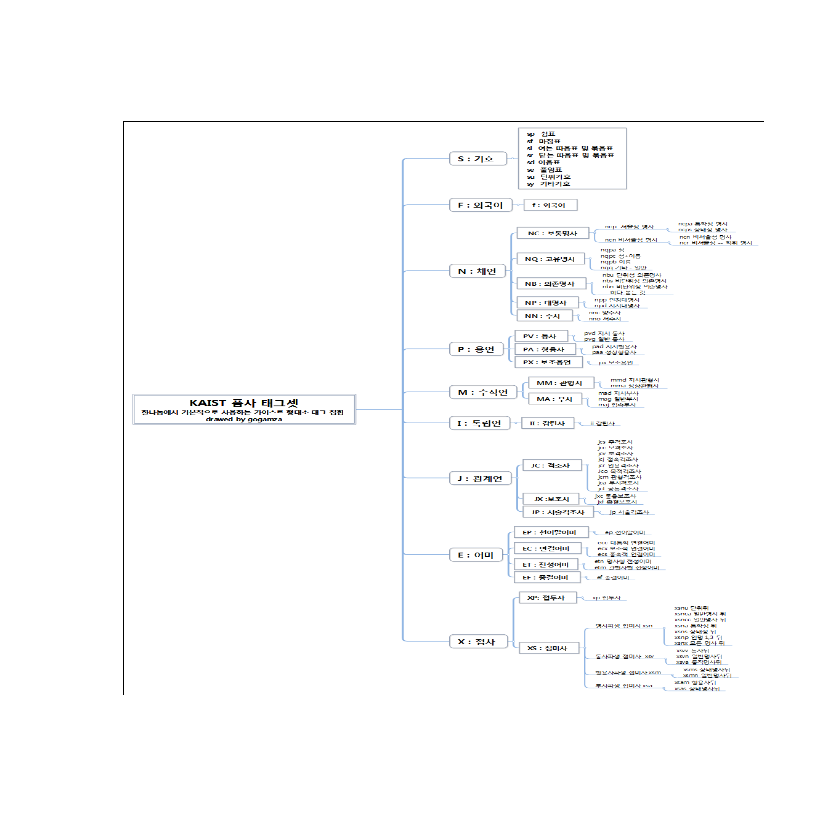

In [40]:
# library(png)
img <- readPNG('../r_source/konlp_tags.png')
plot.new()
rect(0,0,1,1, col="white")
rasterImage(img, 0, 0, 1, 1) # rasterImage(image, xleft, ybottom, xright, ytop)

In [27]:
schedule <- gsub('-',"",schedule)
schedule <- gsub(' ',"",schedule)
schedule <- gsub('·',"",schedule)

In [28]:
#명사만추출
noun <- sapply(schedule, extractNoun,USE.NAMES = F)
noun2 <- unlist(noun)# 명사통합
noun2 <- Filter(function(x){nchar(x)>=2},noun2) #두글자 이상만 필터링

In [ ]:
word_count <- table(noun2)
word_count
head(sort(word_count,decreasing = TRUE),10)

# wordcloud(names(word_count, freq=))

#필요없는 것들 삭제 - // , . - 부호표기 등 grep()